In [32]:
%matplotlib notebook

import nibabel as nib 
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from pathlib import Path
import numpy as np

In [2]:
root_path = Path("/scratch/scratch6/akansh12/Parse_data/train/train/")

In [3]:
train_image_file = list(root_path.glob("*/image/*"))
train_label_file = list(root_path.glob("*/label/*"))

In [5]:
def change_img_to_label_path(path):
    parts = list(path.parts)
    parts[parts.index("image")] = "label"  
    return Path(*parts)

In [6]:
sample_image = nib.load(train_image_file[0])
sample_label = nib.load(change_img_to_label_path(train_image_file[0]))
sample_image_data = sample_image.get_fdata()
sample_label_data = sample_label.get_fdata().astype('int')

#### Frangi

In [18]:
import skimage
from skimage.filters import frangi, hessian

In [26]:
a = sample_image_data[:,256,:]
a_label  = sample_label_data[:,256,:]

<IPython.core.display.Javascript object>


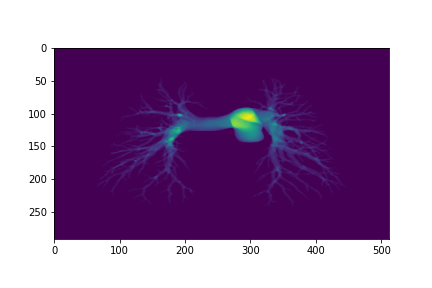

In [51]:
plt.imshow((np.rot90(np.sum(sample_label_data, axis = 1))))

<IPython.core.display.Javascript object>


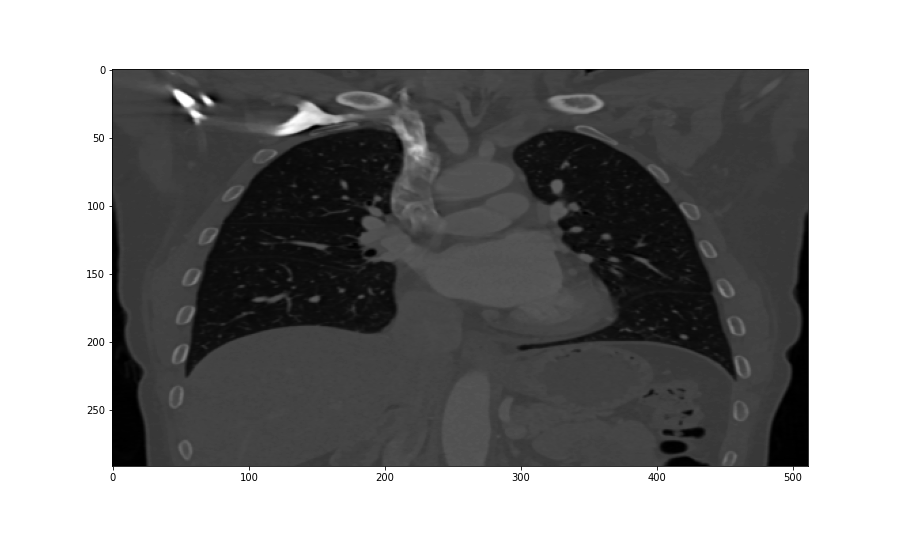

In [35]:
plt.imshow(np.rot90(a), cmap = "gray")

<IPython.core.display.Javascript object>


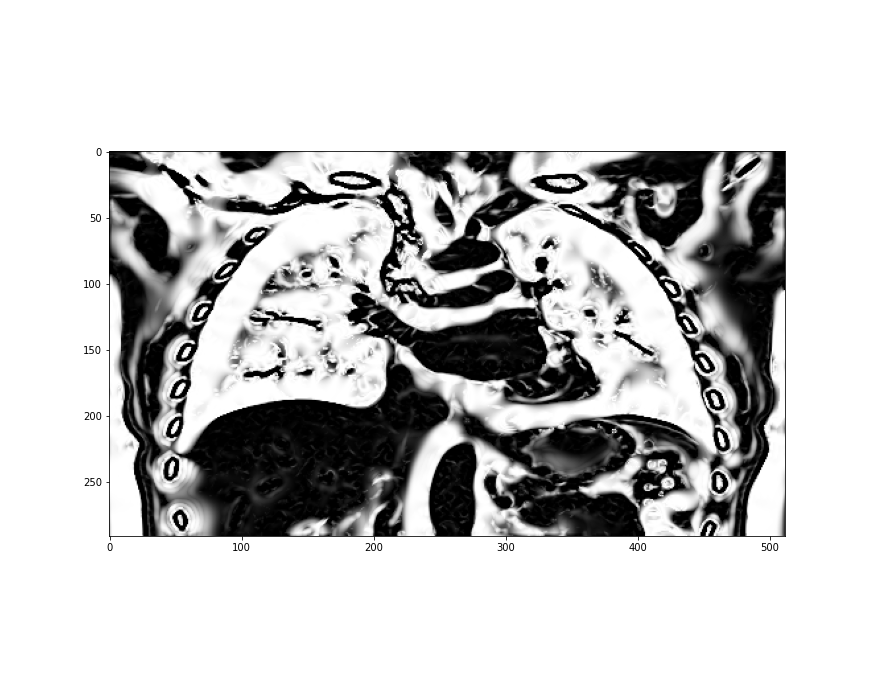

In [36]:
plt.imshow((frangi(np.rot90(a))), cmap = "gray")

In [38]:
frangiResult = frangi(skimage.util.invert(np.rot90(a)), scale_range=(4, 5), black_ridges=True);

<IPython.core.display.Javascript object>


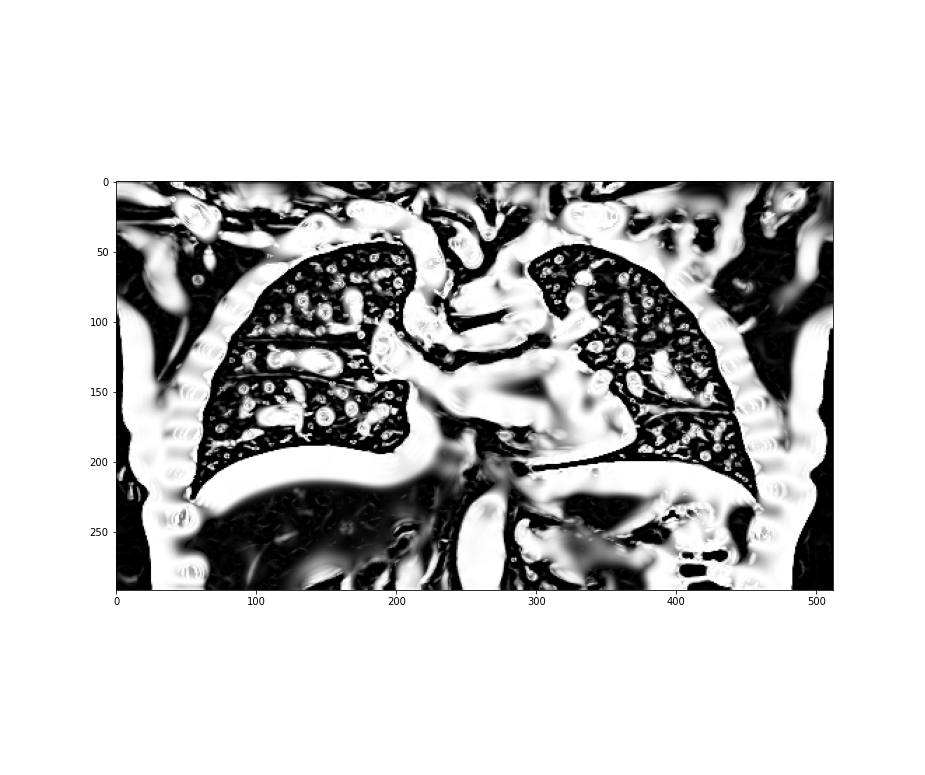

In [39]:
plt.imshow(frangiResult, cmap = "gray")